# Implementation of FIR Filter in the FPGA

In [3]:
import numpy as np
from numpy import savetxt, loadtxt
import matplotlib.pyplot as plt

In [59]:
# Let us generate a wave function with two main frequencies, an high one and a low one:

data_size = 250
noise = 1 # the higher the noisier
file = open("../signal.txt", "w")


input_sig = []

for i in range(data_size):
    sig = 62*(np.sin(i/(11*np.pi))+ noise)
    noise = -noise
    input_sig.append(sig.astype(int)) # we write it as an int
    file.write(str(sig.astype(int)))
    file.write('\n')

file.close()

In [60]:
print(min(input_sig),max(input_sig))

-123 123


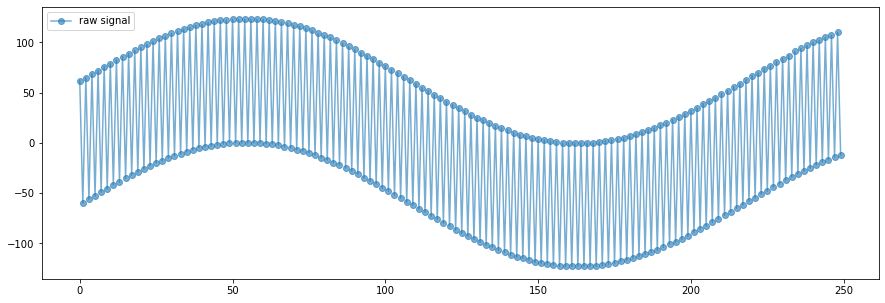

In [61]:
# Now we visualize it:
sig = np.loadtxt("../signal.txt", delimiter='\n')
t = np.arange(len(input_sig)) # array for the x coordinate, just for displaying

plt.figure(figsize=(15, 5))

plt.plot(t, sig, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

In [30]:
# After being computed on the actual FPGA

In [54]:
# I just copied from the terminal, had some problems in reading from a file :/
fpga = [0,0,0,0,-2,-11,-6,-5,-5,-5,-4,-4,-4,-3,-3,-2,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,5,5,5,5,4,4,4,4,3,3,3,3,2,2,2,1,1,1,1,0,0,0,-1,-1,-2,-2,-2,-3,-3,-3,-4,-4,-5,-5,-5,-6,-6,-6,-7,-7,-8,-8,-8,-9,-9,-9,-10,-10,-11,-11,-11,-12,-12,-12,-13,-13,-13,-14,-11,15,17,17,17,17,16,16,16,16,15,15,15,15,14,14,14,14,14,14,14,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,15,15,15,15,15,16,16,16,16,17,17,17,18,15,-11,-14,-13,-13,-13,-12,-12,-12,-11,-11,-10,-10,-10,-9,-9,-9,-8,-8,-7,-7,-7,-6,-6,-6,-5,-5,-4,-4,-4,-3,-3,-3,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,5,5,5,5,5,4,4,4,4,3,3,3,2,2,2,2,1,1,1,0,0,0,-1,-1,-1,-2,-2,-3,-3,-3,-4,-4,-4,-5,-5,-6,-6,-6,-7,-7,-8,-8,-8,-9,-9,-9,-10,-10,-11,-11,-11,-12,-12,-12,-13,-13,-13,-11,15,18,17,17,17,17,16,16,16,16,15,15,15,15,15,14,14,14,14,14,14,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,15,15,15,15,15,16,16,16,16,17,17,17,17,18,15,-11,-13,-13,-13,-12,-12,-12,-11,-11,-10,-10,-10,-9,-9,-9,-8,-8,-8,-7,-7,-6,-6,-6,-5,-5,-4,-4,-4,-3,-3,-3,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7]
for i in range(len(fpga)):
    # 2**10 due to truncation of bits
    # 2**9 because I multiplied the coefficients by 2**9
    fpga[i] = (2**10/2**8)*fpga[i]+ 127

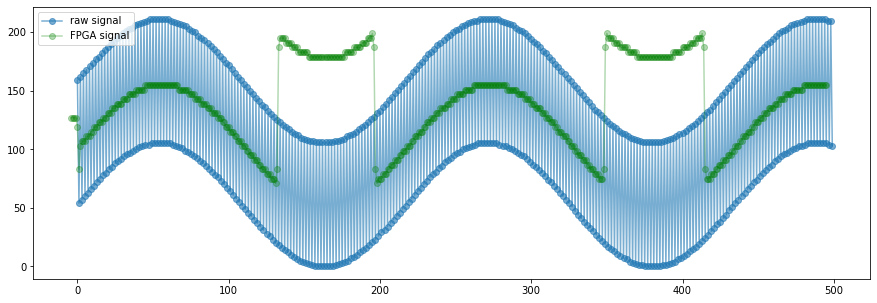

In [55]:
plt.figure(figsize=(15, 5))

t = np.arange(len(input_sig))
plt.plot(t, input_sig, '-o',alpha=.6,label='raw signal')
t = np.arange(len(fpga))
plt.plot(t-4, fpga, '-o', color='g',alpha=.3,label='FPGA signal')

#plt.title("")
#plt.xlim(0,200) #just for the latex report
plt.legend(loc="upper left")